In [1]:
import os
import mmap
import cv2
import time
import numpy as np
from skimage import io
from matplotlib import image
import matplotlib.pyplot as plt

In [2]:
size = 1300
stride = 1200

In [3]:
def is_pad_needed(H, W, C, size, stride, img, image_name):
    if (H%stride) == 0 and (W%stride) == 0:
        print('No padding required for image {}'.format(image_name))
    
    else:
        print('Image -> {}:'.format(image_name))
        if (H%stride) != 0:
            print('\t Padded horizontally, {} pixels'.format(size - H%stride))
            h_pad = W + size - H%stride
        
        if (W%stride) != 0:
            print('\t Padded vertically  , {} pixels'.format(size - W%stride))
            v_pad = H + size - W%stride
        
        temp = np.zeros((v_pad, h_pad, C), dtype=np.uint8)
        temp[:H, :W, :] = img
        return temp

In [4]:
def get_valid_image_file(image_file):
    try:
        img = io.imread(image_file)
    except:
        return False
    else:
        return True

In [5]:
files = []
# failed_files = []

base_dir = './stratford_rgb/'
save_dir = './crops'+'_'+str(size)+'_'+str(stride)

for file in os.listdir(base_dir):
    if file.endswith('.png'):
        files.append(file)

In [6]:
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
if not os.path.isdir(save_dir+'/images/'):
    os.mkdir(save_dir+'/images/')

In [7]:
crop_file = open(os.path.join(save_dir,('test_crops_' + str(size) + '_' + str(stride) + '.txt')), 'w')

for file in files:
    path_to_image = os.path.join(base_dir,file)
    img = cv2.imread(path_to_image)
    
    H,W,C = img.shape
    
    img = is_pad_needed(H, W, C, size, stride, img, file)
    
    maxx = int(np.ceil((H-size)/stride))
    maxy = int(np.ceil((W-size)/stride))
    
    for x in range(maxx+1):
        for y in range(maxy+1):
            im_ = img[x*stride:x*stride + size,y*stride:y*stride + size,:]
            cv2.imwrite(save_dir+'/images/{}_{}_{}.png'.format(file[:-4],x,y),  im_)
            
            crop_file.write('{}_{}_{}.png\n'.format(file[:-4],x,y))
            
crop_file.close()
            

Image -> 1km17501048040SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17501047990SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17504048010SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17501048000SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17503048030SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17502048020SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17501048010SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17500048000SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17498048020SWOOP2015.png:
	 Padded horizontally, 1100 pixels
	 Padded vertically  , 1100 pixels
Image -> 1km17498048000SWOOP

In [5]:
import rasterio as rio
from rasterio.plot import show

import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [6]:
files_dir = './Stratford_Only_images/'
save_dir = './stratford_rgb/'

images = os.listdir(files_dir)

if '.ipynb_checkpoints' in images:
    images.remove('.ipynb_checkpoints')

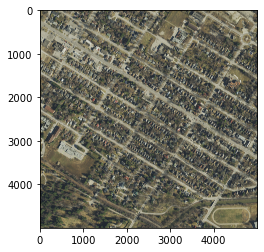

In [7]:
for image_name in images:
    dataset = rio.open(os.path.join(files_dir, image_name))
    image = dataset.read()
    image2 = np.einsum('ijk->jki',image)
    
    save_path = os.path.join(save_dir,(image_name[:-4]+'.png'))
#     plt.imsave(save_path, image2[:,:,0:3])
    plt.imshow(image2[:,:,0:3])
    break